<img src="https://news.research.stlouisfed.org/wp-content/uploads/2021/03/FINAL-30-years_LG.png">

# Economic Data Analysis with Fred
Fred is an economic data website which include a varity of data sources; it's all time series data, financial, and economic data. Beside, they have their own API so there is no need to scrap the website or download csv.


**For now**, I don't know what I going to do yet, but I'm exploring the abilities of Fred and its data.

<br>

In [1]:
# import the essential python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---


# Step 0: Set the API
To get my api key, I need to go to [Fred API Keys](https://fred.stlouisfed.org/docs/api/api_key.html) and request an API Key.

And to request this key, I need to: 
1. Register a Fred account using my Google one.
2. Enter a simple message explaining what I'm going to do with the API Key.
3. Finally, accept the Fred rules.

<br>

In [2]:
# installing fredapi
!pip install fredapi

In [3]:
# import the API key
from fredapi import Fred

# I've made mine api key as a secret config variable
# but for you but your api key here
fred_key = 'put your key here' 

# but me I gonna get my Kaggle secret api key 
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_api = user_secrets.get_secret("fred_api")

# Create fred object
fred = Fred(api_key=fred_api)

# if you want to just use the data, here is it:
thedata = pd.read_csv('/kaggle/input/economic-growth-and-unemployment-rate/gdp_and_unemp.csv')

If you want to make you API as secret on GitHub, [read this](https://www.kaggle.com/discussions/general/441975)

And for Kaggle, just go `Add-ons` > `Secrets` and deal with it.

---

# Step 1: Pull the data
I'm going to explore the relationship between the growth rate of the economy and the unemployment rate in the last four years since `COVID-19`. 


**Side Note:**
*I do my search on Fred website first, then get the series id and put it here.*

In [4]:
# Based on my needs, here is the data
gdp = fred.get_series(series_id='GDP')
gdp = pd.DataFrame(gdp)
gdp = gdp.reset_index()
gdp.columns = ['Date', 'GDP'] 

unemp = fred.get_series(series_id='U2RATE')
unemp = pd.DataFrame(unemp)
unemp = unemp.reset_index()
unemp.columns = ['Date', 'Unemp']


# merge the data
merged_data = pd.merge(gdp, unemp, on='Date', how='inner')
merged_data.head(2)

,Date,GDP,Unemp
0,1967-01-01,844.170,1.6
1,1967-04-01,848.983,1.6



---


# Step 2: Explore the relationship
Now we have a dataframe with three features; `Date`, `GDP` Gross Domestic Product (Billions of Dollars), and `Unemp` Unemployment Rate (Percent).

In [5]:
# define the time period from 2019 to 2023
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
df = merged_data[(merged_data['Date'] >= '2019-01-01') & (merged_data['Date'] <= '2023-12-31')]
df.head()

,Date,GDP,Unemp
208,2019-01-01,21104.133,1.9
209,2019-04-01,21384.775,1.7
210,2019-07-01,21694.282,1.7
211,2019-10-01,21902.390,1.7
212,2020-01-01,21706.513,1.6


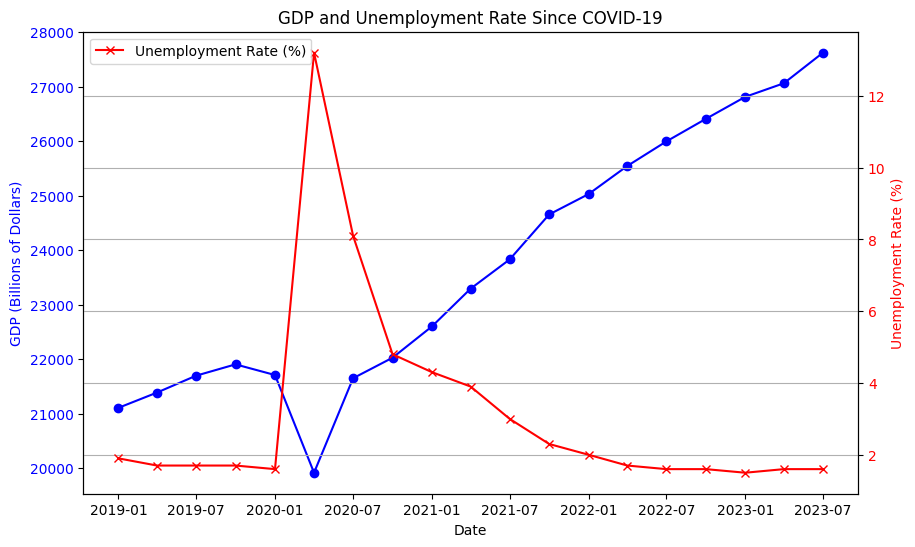

In [6]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP on the left y-axis
ax1.plot(df['Date'], df['GDP'], color='b', marker='o', label='GDP (Billions of Dollars)')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP (Billions of Dollars)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot Unemployment Rate on the right y-axis
ax2.plot(df['Date'], df['Unemp'], color='r', marker='x', label='Unemployment Rate (%)')
ax2.set_ylabel('Unemployment Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set titles and legend
plt.title('GDP and Unemployment Rate Since COVID-19')
plt.legend(loc='upper left', fontsize='medium')

# Show the plot
plt.grid(True)
plt.show()


That's all ..

### **Project Conclusion:**

As anticipated, our analysis reveals a clear relationship between unemployment rates and GDP fluctuations. Notably, during the challenging year of 2020, when unemployment rates surged, we observed a corresponding decline in GDP. 

This observation underscores a fundamental economic principle: "With lower unemployment rates, we are more likely to achieve higher gross domestic product (GDP)." 

<hr>

# Resources
(1) The first inspiration to even work with Fred API was [Rob Mulla YouTube video about Economic Data Analysis](https://www.kaggle.com/code/robikscube/economic-analysis-with-pandas-youtube-tutorial/notebook)

(2) How to [make you API key as a secret](https://www.kaggle.com/discussions/general/441975) - I put it on a Kaggle discussion

(3) Basic economics concepts on [Khan Academy](https://www.khanacademy.org/economics-finance-domain/macroeconomics/macro-basic-economics-concepts)

(4) The hero of the project without a doubt is the data; here is the [GDP series](https://fred.stlouisfed.org/series/GDP) and the [Unemployment rate series](https://fred.stlouisfed.org/series/U2RATE)

<div><br></div>

---

* 💼 For more, take a look at my work on **[GitHub](https://github.com/mohamedyosef101)**
* 💬 And, if you have any questions, feel free to contact me via **[email](mailto:mohamedyosef101@outlook.com)** or **[LinkedIn](https://linkedin.com/in/mohamedyosef101)**.